# 1. Transformación de la base `movies_dataset`

Este parte del proyecto corresponde a la fase de ETL (Extraction, Transformation and Loading). El objetivo de esta fase es obtener datasets limpios y listos para ser utilizado en fases posteriores del proyecto.

## 1.1. Importe de librerías

In [ ]:
import pandas as pd
import numpy as np
import ast

## 1.2 Cargando los datos

 Se carga la base de datos `movies_dataset.csv` se debe tener en cuenta que hay datos que estan anidados (un diccionario o una lista como valores en la fila). [Data](https://drive.google.com/drive/folders/1X_LdCoGTHJDbD28_dJTxaD4fVuQC9Wt5)

In [ ]:
movies_df = pd.read_csv('/content/movies_dataset.csv')

<ipython-input-2-3ad0ac82514a>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('/content/movies_dataset.csv')


Se visualizan las primeras 5 filas del DataFrame, para hacerse una idea de la data.

In [ ]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## 1.2 Explorando las informaciones

Se observan algunas filas puntuales de aquellas columnas que están anidadas.

In [ ]:
movies_df.belongs_to_collection[0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [ ]:
movies_df.belongs_to_collection[2]

"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}"

In [ ]:
movies_df.genres[1]

"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]"

In [ ]:
movies_df.production_companies[3]

"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]"

## 1.3 Tratamiento de datos iniciales

### 1.3.1. Columna `belongs_to_collection`

Se crea la función `convertir_a_diccionario`, la cual que asegura que los valores de una columna en un DataFrame de pandas estén en formato de diccionario, manejando adecuadamente los valores nulos y las cadenas de texto.

In [ ]:
# Nos aseguramos de que todos los valores estén en formato de diccionario mediante la siguiente función
def convertir_a_diccionario(valor):
    if pd.isna(valor):
        return {}  # Retorna un diccionario vacío si el valor es NaN. Esto asegura que los valores nulos no causen problemas al desanidar.
    if isinstance(valor, str): # Verifica si el valor es una cadena (str).
        return ast.literal_eval(valor)  # Convierte las cadenas en diccionarios
    return valor

In [ ]:
import ast #  ast, es necesario para convertir las cadenas en diccionarios.

In [ ]:
# Aplicamos la función a la columna 'belongs_to_collection'
movies_df['belongs_to_collection'] = movies_df['belongs_to_collection'].apply(convertir_a_diccionario)

In [ ]:
# Desanidamos la columna 'belongs_to_collection'
belongs_to_collection_df = pd.json_normalize(movies_df['belongs_to_collection'])

In [ ]:
# Renombramos las columnas desanidadas
belongs_to_collection_df.columns = ['belongs_to_collection_id',
                                    'belongs_to_collection_name',
                                    'belongs_to_collection_poster_path',
                                    'belongs_to_collection_backdrop_path']

In [ ]:
# Unimos el DataFrame original con las nuevas columnas desanidadas
movies_df = pd.concat([movies_df, belongs_to_collection_df], axis=1)

In [ ]:
# Eliminamos la columna original que ya no es necesaria
movies_df = movies_df.drop(columns=['belongs_to_collection'])

Visualizamos cómo quedaron las columnas desanidadas de `belongs_to_collection`

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                45466 non-null  object 
 1   budget                               45466 non-null  object 
 2   genres                               45466 non-null  object 
 3   homepage                             7782 non-null   object 
 4   id                                   45466 non-null  object 
 5   imdb_id                              45449 non-null  object 
 6   original_language                    45455 non-null  object 
 7   original_title                       45466 non-null  object 
 8   overview                             44512 non-null  object 
 9   popularity                           45461 non-null  object 
 10  poster_path                          45080 non-null  object 
 11  production_companies        

### 1.3.2. Columna `production_companies`

Se crea la función función `extraer_nombres` asegura que los valores de una columna en un DataFrame de pandas estén en formato de diccionario, manejando adecuadamente los valores nulos y las cadenas de texto.

In [ ]:
# Función para extraer los nombres de las compañías
def extraer_nombres(companies):
    # Nos aseguramos de que el input es una lista (puede estar en formato string)
    if isinstance(companies, str):                # isinstance(companies, str): Verifica si companies es una cadena de texto (str).
        companies = ast.literal_eval(companies)        # Si companies es una cadena, se usa ast.literal_eval para convertir esa cadena en una estructura de datos de Python, que en este caso debería ser una lista de diccionarios.
    if isinstance(companies, list):                # Verifica si companies es ahora una lista (lo que podría haber sido originalmente o después de la conversión en el paso anterior).
        return [company.get('name') for company in companies if isinstance(company, dict)]   # if isinstance(company, dict): Se asegura de que cada company sea un diccionario antes de intentar extraer el nombre. Esto previene errores si hay algún elemento que no sea un diccionario.
    return None                                                                              # company.get('name'): Extrae el valor asociado a la clave name en cada diccionario company.

In [ ]:
# Aplicamos la función a la columna 'production_companies'
movies_df['production_companies'] = movies_df['production_companies'].apply(extraer_nombres)

In [ ]:
# Mostramos las primeras filas del DataFrame para verificar
movies_df[['production_companies']].head()

,production_companies
0,[Pixar Animation Studios]
1,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,"[Warner Bros., Lancaster Gate]"
3,[Twentieth Century Fox Film Corporation]
4,"[Sandollar Productions, Touchstone Pictures]"


Visualizamos cómo quedaron las columnas desanidadas de `production_companies`

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                45466 non-null  object 
 1   budget                               45466 non-null  object 
 2   genres                               45466 non-null  object 
 3   homepage                             7782 non-null   object 
 4   id                                   45466 non-null  object 
 5   imdb_id                              45449 non-null  object 
 6   original_language                    45455 non-null  object 
 7   original_title                       45466 non-null  object 
 8   overview                             44512 non-null  object 
 9   popularity                           45461 non-null  object 
 10  poster_path                          45080 non-null  object 
 11  production_companies        

### 1.3.3. Columna `genres`

Se crea la función función `extraer_nombres` asegura que los valores de una columna en un DataFrame de pandas estén en formato de diccionario, manejando adecuadamente los valores nulos y las cadenas de texto.

In [ ]:
# Función para extraer los nombres de los géneros
def extraer_nombres(genres):
    # Nos aseguramos de que el input es una lista (puede estar en formato string)
    if isinstance(genres, str):
        genres = ast.literal_eval(genres)
    if isinstance(genres, list):
        return [genre.get('name') for genre in genres if isinstance(genre, dict)]
    return None

In [ ]:
# Aplicamos la función a la columna 'genres'
movies_df['genres'] = movies_df['genres'].apply(extraer_nombres)

In [ ]:
# Mostramos las primeras filas del DataFrame para verificar
movies_df[['genres']].head()

,genres
0,"[Animation, Comedy, Family]"
1,"[Adventure, Fantasy, Family]"
2,"[Romance, Comedy]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]


### 1.3.4. Columna `production_countries`

Se crea la función `extraer_paises`, la cual está diseñada para extraer los nombres de los países de producción de una lista de diccionarios (o una cadena que representa una lista)

In [ ]:
# Función para extraer los nombres de los países de producción
def extraer_paises(production_countries):
    # Nos aseguramos de que el input es una lista (puede estar en formato string)
    if isinstance(production_countries, str):
        production_countries = ast.literal_eval(production_countries)
    if isinstance(production_countries, list):
        return [country.get('name') for country in production_countries if isinstance(country, dict)]
    return None

In [ ]:
# Aplicamos la función a la columna 'production_countries'
movies_df['production_countries'] = movies_df['production_countries'].apply(extraer_paises)


In [ ]:
# Mostramos las primeras filas del DataFrame para verificar
movies_df[['production_countries']].head()

,production_countries
0,[United States of America]
1,[United States of America]
2,[United States of America]
3,[United States of America]
4,[United States of America]


Visualizamos cómo quedaron las columnas desanidadas de `production_countries`

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                45466 non-null  object 
 1   budget                               45466 non-null  object 
 2   genres                               45466 non-null  object 
 3   homepage                             7782 non-null   object 
 4   id                                   45466 non-null  object 
 5   imdb_id                              45449 non-null  object 
 6   original_language                    45455 non-null  object 
 7   original_title                       45466 non-null  object 
 8   overview                             44512 non-null  object 
 9   popularity                           45461 non-null  object 
 10  poster_path                          45080 non-null  object 
 11  production_companies        

### 1.3.4. Columna `spoken_languages`

Se crea la función `extraer_idiomas`, la cual está diseñada para extraer los nombres de los idiomas hablados a partir de una lista de diccionarios (o una cadena que representa dicha lista)

In [ ]:
# Función para extraer los nombres de los idiomas hablados
def extraer_idiomas(spoken_languages):
    # Nos aseguramos de que el input es una lista (puede estar en formato string)
    if isinstance(spoken_languages, str):
        spoken_languages = ast.literal_eval(spoken_languages)
    if isinstance(spoken_languages, list):
        return [language.get('name') for language in spoken_languages if isinstance(language, dict)]
    return None

In [ ]:
# Aplicamos la función a la columna 'spoken_languages'
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(extraer_idiomas)

In [ ]:
# Mostramos las primeras filas del DataFrame para verificar
movies_df[['spoken_languages']].head()

,spoken_languages
0,[English]
1,"[English, Français]"
2,[English]
3,[English]
4,[English]


### 1.3.4. Valores nulos de los campos `revenue` y `budget`

In [ ]:
# Rellenar los valores nulos de las columnas 'revenue' y 'budget' con 0
movies_df['revenue'].fillna(0, inplace=True)
movies_df['budget'].fillna(0, inplace=True)

In [ ]:
# Verificamos que se hayan rellenado los valores nulos
print(movies_df[['revenue', 'budget']].isnull().sum())

revenue    0
budget     0
dtype: int64


### 1.3.5. Valores nulos del campo `releas_date`

In [ ]:
# Eliminamos las filas con valores nulos en la columna 'release_date'
movies_df.dropna(subset=['release_date'], inplace=True)

# Este método elimina todas las filas del DataFrame que tienen valores nulos en la columna release_date.
# subset=['release_date']: Indica que solo se deben considerar los valores nulos en esta columna.

In [ ]:
# Verificamos que se hayan eliminado los valores nulos
print(movies_df['release_date'].isnull().sum())

0


### 1.3.6. Formato de fecha y creación de columna `release_year`

In [ ]:
# Revisamos el formato de la fecha
movies_df.release_date

,release_date
0,1995-10-30
1,1995-12-15
2,1995-12-22
3,1995-12-22
4,1995-02-10
...,...
45460,1991-05-13
45462,2011-11-17
45463,2003-08-01
45464,1917-10-21


In [ ]:
# Convertimos la columna 'release_date' a tipo datetime, forzando el formato
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d', errors='coerce')


In [ ]:
# Verificamos si hay fechas no válidas
if movies_df['release_date'].isnull().any():
    print("Hay fechas no válidas en la columna 'release_date'.")
else:
    print("Todas las fechas están en el formato AAAA-mm-dd.")

Hay fechas no válidas en la columna 'release_date'.


In [ ]:
# Extraemos el año y crear la nueva columna 'release_year'
movies_df['release_year'] = movies_df['release_date'].dt.year

In [ ]:
# Mostramos las primeras filas del DataFrame para verificar
print(movies_df[['release_date', 'release_year']].head())

  release_date  release_year
0   1995-10-30        1995.0
1   1995-12-15        1995.0
2   1995-12-22        1995.0
3   1995-12-22        1995.0
4   1995-02-10        1995.0


### 1.3.7. Columna `return`

In [ ]:
# Identificamos las filas donde 'budget' no es convertible a float
invalid_budget = movies_df[~movies_df['budget'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Mostrar las filas con valores inválidos en 'budget'
print(invalid_budget[['budget']])

                                 budget
19730  /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg


In [ ]:
# Reemplazamos los valores inválidos por 0
movies_df['budget'] = movies_df['budget'].apply(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else 0)

In [ ]:
# Nos aseguramos de que 'revenue' y 'budget' son del tipo correcto (float)
movies_df['revenue'] = movies_df['revenue'].astype(float)
movies_df['budget'] = movies_df['budget'].astype(float)

In [ ]:
# Creamos la nueva columna 'return' calculando revenue / budget
movies_df['return'] = movies_df.apply(                                                          # Se utiliza apply junto con una función lambda para calcular el retorno de inversión.
    lambda row: row['revenue'] / row['budget'] if row['budget'] != 0 else 0, axis=1             # La función comprueba si budget es diferente de 0. Si es así, calcula revenue / budget; de lo contrario, asigna 0 a la nueva columna.
)

In [ ]:
# Verificamos las primeras filas del DataFrame para asegurarnos de que se haya creado la columna
print(movies_df[['revenue', 'budget', 'return']].head())

       revenue      budget     return
0  373554033.0  30000000.0  12.451801
1  262797249.0  65000000.0   4.043035
2          0.0         0.0   0.000000
3   81452156.0  16000000.0   5.090760
4   76578911.0         0.0   0.000000


### 1.3.8. Eliminación de columnas

In [ ]:
# Eliminamos las columnas especificadas
columns_to_drop = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage']
movies_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Verificar que las columnas han sido eliminadas
print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45379 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   budget                               45379 non-null  float64       
 1   genres                               45379 non-null  object        
 2   id                                   45379 non-null  object        
 3   original_language                    45368 non-null  object        
 4   overview                             44438 non-null  object        
 5   popularity                           45377 non-null  object        
 6   production_companies                 45376 non-null  object        
 7   production_countries                 45376 non-null  object        
 8   release_date                         45376 non-null  datetime64[ns]
 9   revenue                              45379 non-null  float64       
 10  runtime        

In [ ]:
# Exportamos el DataFrame a un archivo CSV
# movies_df.to_csv('movies_df.csv', index=False)

# Descargamos el archivo CSV
# from google.colab import files
# files.download('movies_df.csv')

# 2. Transformación de la base `credits`

## 2.1. Cargando los datos

 Se carga la base de datos `credits.csv` se debe tener en cuenta que hay datos que estan anidados (un diccionario o una lista como valores en la fila). [Data](https://drive.google.com/drive/folders/1X_LdCoGTHJDbD28_dJTxaD4fVuQC9Wt5)

In [ ]:
df = pd.read_csv('/content/credits.csv')

Se visualiza la información principal de la base

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


Se visualizan las primeras 5 filas del DataFrame, para hacerse una idea de la data.

In [ ]:
df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Se visualiza una fila en particular de la columna `crew`

In [ ]:
df['crew'][1]

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

## 2.2. Tratamiento de datos iniciales

### 2.2.1. Columna `cast`

Convertimos la columna `cast` de cadenas a listas de diccionarios.

In [ ]:
df['cast'] = df['cast'].apply(ast.literal_eval)

Extraemos los nombres de los actores de esas listas y los almacenamos en una nueva columna llamada `reparto`

In [ ]:
df['reparto'] = df['cast'].apply(lambda x: [actor['name'] for actor in x])

Mostramos las columnas `id` y `reparto` del DataFrame, para visualizar la relación entre los identificadores de las películas y sus respectivos repartos.

In [ ]:
df[['id', 'reparto']]

,id,reparto
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim..."
...,...,...
45471,439050,"[Leila Hatami, Kourosh Tahami, Elham Korda]"
45472,111109,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe..."
45473,67758,"[Erika Eleniak, Adam Baldwin, Julie du Page, J..."
45474,227506,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa..."


Observamos una fila en particular de la nueva columna `reparto`

In [ ]:
df['reparto'][0]

['Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'Jim Varney',
 'Wallace Shawn',
 'John Ratzenberger',
 'Annie Potts',
 'John Morris',
 'Erik von Detten',
 'Laurie Metcalf',
 'R. Lee Ermey',
 'Sarah Freeman',
 'Penn Jillette']

### 2.2.2. Columna `crew`

Convertimos la columna `crew` de cadenas a listas de diccionarios.

In [ ]:
df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

Extraemos el nombre del director de cada lista y lo almacenamos en una nueva columna llamada `Director`

In [ ]:
df['Director'] = df['crew'].apply(lambda x: next((member['name'] for member in x if isinstance(member, dict) and member.get('job') == 'Director'), None) if isinstance(x, list) else None)

Mostramos las columnas `id` y `director` del DataFrame, para visualizar la relación entre los identificadores de las películas y sus respectivos directores.

In [ ]:
df[['id', 'Director']]

,id,Director
0,862,John Lasseter
1,8844,Joe Johnston
2,15602,Howard Deutch
3,31357,Forest Whitaker
4,11862,Charles Shyer
...,...,...
45471,439050,Hamid Nematollah
45472,111109,Lav Diaz
45473,67758,Mark L. Lester
45474,227506,Yakov Protazanov


Filtramos el DataFrame para mantener solo las columnas `id`, `reparto`, y `Director`

In [ ]:
df = df[['id', 'reparto', 'Director']]


Mostramos la información general sobre el DataFrame resultante.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45476 non-null  int64 
 1   reparto   45476 non-null  object
 2   Director  44589 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


2.2.3. Muestra final de `credits`

Debido al tamaño del archivo se tienen complicación para generar los modelos y luego correr la API en Render, por ello se determina tomar una muestra aleatoria de 30.000 filas.

In [ ]:
muestra_credit_df = df.sample(n=30000, random_state=1)

Se revisa la información principal de la muestra

In [ ]:
muestra_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 17654 to 25944
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        30000 non-null  int64 
 1   reparto   30000 non-null  object
 2   Director  29424 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.5+ KB


Se descarga la muestra

In [ ]:
#from google.colab import files

# Guardar el DataFrame como un archivo CSV
#muestra_credit_df.to_csv('muestra_credit_df.csv', index=False)

# Descargar el archivo
#files.download('muestra_credit_df.csv')


# 3. EDA

El EDA (Exploratory Data Analysis o Análisis Exploratorio de Datos), tiene como objetivo comprender las principales características del conjunto de datos antes de aplicar los modelos predictivos o realizar análisis estadísticos más profundos. El EDA permite descubrir patrones, detectar anomalías, verificar supuestos y probar hipótesis.

## 3.1. Resumen de los datos

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45379 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   budget                               45379 non-null  float64       
 1   genres                               45379 non-null  object        
 2   id                                   45379 non-null  object        
 3   original_language                    45368 non-null  object        
 4   overview                             44438 non-null  object        
 5   popularity                           45377 non-null  object        
 6   production_companies                 45376 non-null  object        
 7   production_countries                 45376 non-null  object        
 8   release_date                         45376 non-null  datetime64[ns]
 9   revenue                              45379 non-null  float64       
 10  runtime        

In [ ]:
# Resumen general de las columnas numéricas
numerical_summary = movies_df.describe()
print(numerical_summary)

             budget                   release_date       revenue  \
count  4.537900e+04                          45376  4.537900e+04   
mean   4.232325e+06  1992-05-15 17:10:50.564174848  1.122936e+07   
min    0.000000e+00            1874-12-09 00:00:00  0.000000e+00   
25%    0.000000e+00            1978-10-06 00:00:00  0.000000e+00   
50%    0.000000e+00            2001-08-30 00:00:00  0.000000e+00   
75%    0.000000e+00            2010-12-17 00:00:00  0.000000e+00   
max    3.800000e+08            2020-12-16 00:00:00  2.787965e+09   
std    1.743932e+07                            NaN  6.438789e+07   

            runtime  vote_average    vote_count  belongs_to_collection_id  \
count  45130.000000  45376.000000  45376.000000               4488.000000   
mean      94.181675      5.624070    110.096439             184073.408868   
min        0.000000      0.000000      0.000000                 10.000000   
25%       85.000000      5.000000      3.000000              86026.250000   
50

**Budget (Presupuesto)**

- **Media:** El presupuesto promedio es de aproximadamente \$ $4.23$ millones, pero la mediana es $0$, lo que sugiere que una gran parte de las películas en el conjunto de datos no tiene presupuesto registrado.

- **Mínimo:** Hay películas con presupuesto de \$ $0$, lo que podría indicar películas de bajo presupuesto o independientes.

- **Máximo:** La película con el mayor presupuesto tiene un costo de \$ $380$ millones, lo que indica que hay algunas grandes producciones en el conjunto de datos.

- **Desviación estándar:** La desviación estándar es bastante alta (aproximadamente \$ $17.44$ millones), lo que sugiere una gran variabilidad en los presupuestos.

**Release Date (Fecha de Estreno)**

- **Rango de Fechas:** Las fechas de estreno van desde el 9 de diciembre de 1874 hasta el 16 de diciembre de 2020, lo que abarca una amplia gama de películas, desde clásicos hasta producciones más recientes.

**Revenue (Ingresos)**

- **Media:** Los ingresos promedio son aproximadamente \$ $11.23$ millones, pero, al igual que el presupuesto, la mediana es $0$. Esto sugiere que muchas películas no generaron ingresos o que los datos de ingresos están incompletos.

- **Mínimo:** También hay ingresos de \$ $0$, lo que puede indicar fracasos comerciales o datos no reportados.

- **Máximo:** El ingreso máximo es de aproximadamente \$ $2.79$ mil millones, lo que indica la presencia de películas de gran éxito en la muestra.

- **Desviación estándar:** La desviación estándar es alta (aproximadamente \$ $64.39$ millones), lo que indica una gran variabilidad en los ingresos generados por las películas.

**Runtime (Duración)**

- **Media:** La duración promedio de las películas es de aproximadamente $94$ minutos, que es un tiempo razonable para películas de longitud estándar. Martin Scorsese (director, guionista y productor de cine estadounidense), ha mencionado que una longitud de tiempo razonable para una película suele estar entre $90$ y $120$ minutos.

- **Máximo:** Hay una película con una duración de $1256$ minutos, lo que parece anómalo y podría indicar un error o que se trata de una colección o documental extenso.

- **Desviación estándar:** La desviación estándar es aproximadamente $38.34$ minutos, lo que sugiere una variedad en la duración de las películas.

**Vote Average (Promedio de Votación)**

- **Media:** Un promedio de $5.62$ indica que la mayoría de las películas tienen calificaciones en la mitad de la escala, sugiriendo que no son particularmente bien valoradas en general.

- **Mínimo:** Hay películas con una calificación de $0$, lo que podría significar que no han recibido votos.

- **Máximo:** La calificación máxima es $10$, que es el tope de la escala de calificaciones, indicando que algunas películas han sido muy bien recibidas.

**Vote Count (Número de Votos)**

- **Media:** El número promedio de votos es de aproximadamente $110$, lo que puede sugerir que solo un número limitado de personas vota por las películas, o que muchas películas son relativamente desconocidas.

- **Máximo:** Un recuento máximo de $14,075$ votos sugiere que algunas películas han sido vistas y evaluadas por un gran número de personas.

**Return (Retorno de Inversión)**

- **Media:** Un retorno promedio de aproximadamente \$ $660$ indica que, en promedio, las películas generan un retorno positivo sobre su presupuesto.

- **Mínimo:** Hay un retorno de \$ $0$, lo que indica que algunas películas no han recuperado su inversión o no tienen este dato reportado.

- **Máximo:** Un retorno máximo de aproximadamente \$ $12.4$ millones sugiere que algunas películas han tenido un éxito financiero significativo.

- **Desviación estándar:** Una desviación estándar alta (aproximadamente $74,690$) indica variabilidad en los retornos.

## 3.2. Valores faltantes

In [ ]:
# Revisión de valores faltantes
valores_faltantes = movies_df.isnull().sum()
print(valores_faltantes)

budget                                     0
genres                                     0
id                                         0
original_language                         11
overview                                 941
popularity                                 2
production_companies                       3
production_countries                       3
release_date                               3
revenue                                    0
runtime                                  249
spoken_languages                           3
status                                    83
tagline                                24981
title                                      3
vote_average                               3
vote_count                                 3
belongs_to_collection_id               40891
belongs_to_collection_name             40891
belongs_to_collection_poster_path      41434
belongs_to_collection_backdrop_path    42119
release_year                               3
return    

- **budget, genres, id, revenue, return:** Estas columnas tienen cero valores faltantes. Esto es positivo, ya que son variables que son indispensables para llevar acabo los endpoints y el sistema de recomendación.

- **production_companies y production_countries (3 faltantes cada uno):** Estos valores faltantes son manejables, y es posible completarlos a partir de datos relacionados o imputar con valores comunes.

- **release_date ($3$ faltantes):** Este es un campo importante para la temporalidad de los datos. Sin embargo la cantidad de faltantes es mínima comparado con el tamaño de la data.

- **runtime ($249$ faltantes):** La duración de las películas es relevante para entender el formato y el tipo de producción. Podría considerarse la imputación media o la media por género, pero se debe tener cuidado al hacerlo, ya que la duración puede ser específica de cada película.

- **overview ($941$ faltantes):** Esta columna es crucial para entender el contenido de las películas. Las entradas sin un resumen pueden limitar el análisis de texto o modelos de NLP que se basan en la descripción de las películas. Se puede considerar la imputación basada en el análisis de otras características, aunque el llenado de datos faltantes de este tipo puede ser complicado. Algo favorable es que estos datos faltantes son apenas un $2,1 \%$ de la data.

- **tagline ($24,981$ faltantes):** Con la mayoría de las entradas faltantes en esta columna, es posible que se considere irrelevante para el análisis general, ya que no todas las películas tienen un lema. Puede ser beneficioso eliminar esta columna o marcarla como "desconocido".

- **belongs_to_collection_id, belongs_to_collection_name, belongs_to_collection_poster_path, belongs_to_collection_backdrop_path:** Con más del $90 \%$ de datos faltantes, estas columnas son prácticamente irrelevantes para el análisis. Se debe considerar la eliminación de estas columnas, ya que la mayoría de las películas no pertenecen a ninguna colección.

In [ ]:
# Debido a que no todas las películas pertenecen a franquicias o series de películas tenemos valores faltantes que
# superan el 90% por ende procedemos a eliminar las columnas asociadas a belongs_to_collection

movies_df = movies_df.drop(columns=[
    'belongs_to_collection_id',
    'belongs_to_collection_name',
    'belongs_to_collection_poster_path',
    'belongs_to_collection_backdrop_path'
])



In [ ]:
# Verificar que las columnas hayan sido eliminadas
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45379 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45379 non-null  float64       
 1   genres                45379 non-null  object        
 2   id                    45379 non-null  object        
 3   original_language     45368 non-null  object        
 4   overview              44438 non-null  object        
 5   popularity            45377 non-null  object        
 6   production_companies  45376 non-null  object        
 7   production_countries  45376 non-null  object        
 8   release_date          45376 non-null  datetime64[ns]
 9   revenue               45379 non-null  float64       
 10  runtime               45130 non-null  float64       
 11  spoken_languages      45376 non-null  object        
 12  status                45296 non-null  object        
 13  tagline              

In [ ]:
# Teniendo en cuenta que los valores faltantes de la columna overview y original_language son apenas un 2,1%
# un 0,02% respectivamente, se eliminarán las filas de estos valores faltantes, pero se dejan las columnas
# porque podrían ser valiosas para el sistema de recomendación

# Eliminar las filas con valores faltantes en las columnas 'overview' y 'original_language'
movies_df = movies_df.dropna(subset=['overview', 'original_language'])

# Verificar que las filas han sido eliminadas
movies_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 44428 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                44428 non-null  float64       
 1   genres                44428 non-null  object        
 2   id                    44428 non-null  object        
 3   original_language     44428 non-null  object        
 4   overview              44428 non-null  object        
 5   popularity            44426 non-null  object        
 6   production_companies  44425 non-null  object        
 7   production_countries  44425 non-null  object        
 8   release_date          44425 non-null  datetime64[ns]
 9   revenue               44428 non-null  float64       
 10  runtime               44425 non-null  float64       
 11  spoken_languages      44425 non-null  object        
 12  status                44361 non-null  object        
 13  tagline              

In [ ]:
# Revisión de valores faltantes
valores_faltantes = movies_df.isnull().sum()
print(valores_faltantes)

budget                      0
genres                      0
id                          0
original_language           0
overview                    0
popularity                  2
production_companies        3
production_countries        3
release_date                3
revenue                     0
runtime                     3
spoken_languages            3
status                     67
tagline                 24038
title                       3
vote_average                3
vote_count                  3
release_year                3
return                      0
dtype: int64


In [ ]:
# La columna tagline, la cual nos proporciona una frase célebre de la pelícuka cuenta con un 54,1% de datos faltantes,
# Esto y junto a lo subjetivo de la frase célebre son los motivos por los cuales se elimina dicha columna

# Eliminar la columna 'tagline' del DataFrame
movies_df = movies_df.drop(columns=['tagline'])

In [ ]:
# Finalmente se eliminaran las filas de los valores faltantes de: popularity, production_companies, release_date,,
# runtime, spoken_languages, status, title, vote_average, vote_count  y release_year que sumados no superan el 0,2% del dataset

movies_df = movies_df.dropna(subset=[
    'popularity',
    'production_companies',
    'release_date',
    'runtime',
    'spoken_languages',
    'status',
    'title',
    'vote_average',
    'vote_count',
    'release_year'
])


In [ ]:
# Revisión de valores faltantes
valores_faltantes = movies_df.isnull().sum()
print(valores_faltantes)

budget                  0
genres                  0
id                      0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
release_year            0
return                  0
dtype: int64


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44361 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                44361 non-null  float64       
 1   genres                44361 non-null  object        
 2   id                    44361 non-null  object        
 3   original_language     44361 non-null  object        
 4   overview              44361 non-null  object        
 5   popularity            44361 non-null  object        
 6   production_companies  44361 non-null  object        
 7   production_countries  44361 non-null  object        
 8   release_date          44361 non-null  datetime64[ns]
 9   revenue               44361 non-null  float64       
 10  runtime               44361 non-null  float64       
 11  spoken_languages      44361 non-null  object        
 12  status                44361 non-null  object        
 13  title                

## 3.3. Distribución de variables numéricas

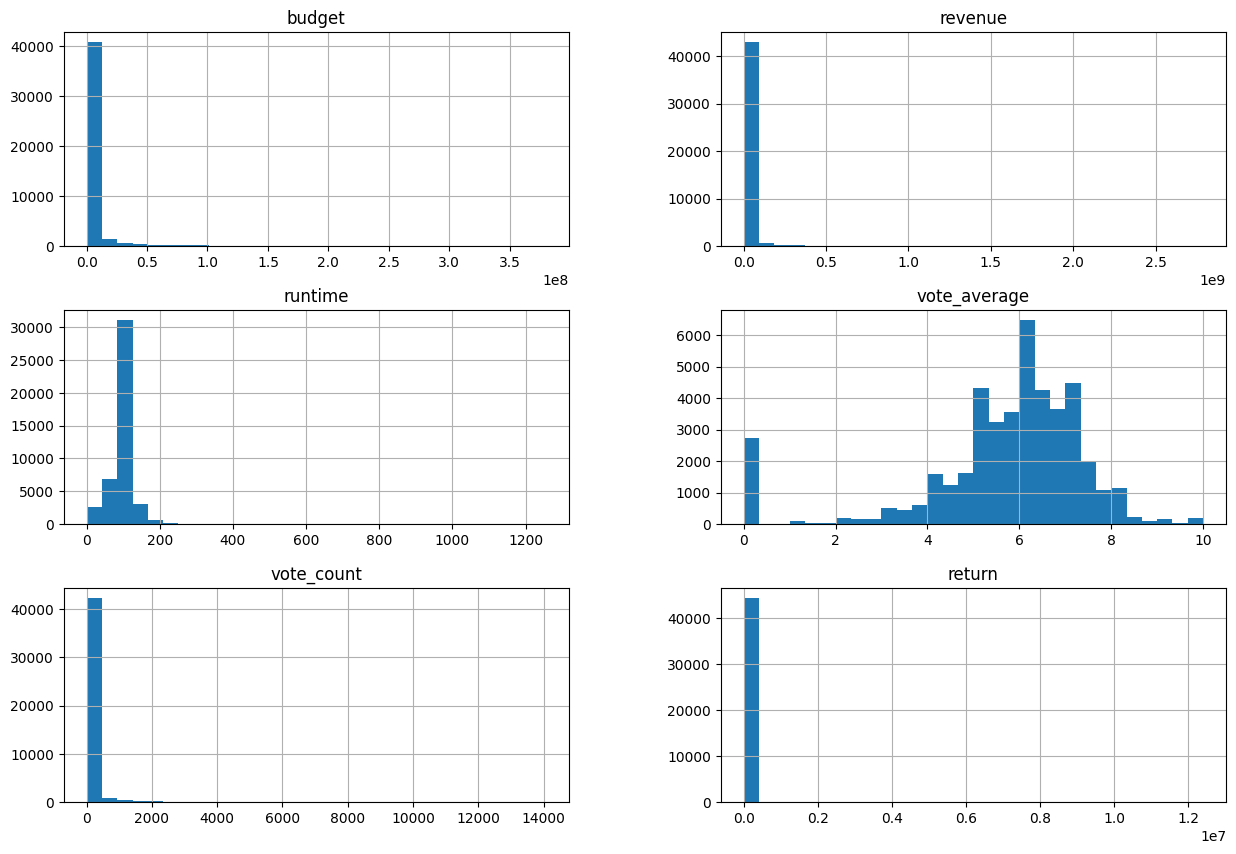

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuciones de variables numéricas
numerical_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']
movies_df[numerical_columns].hist(bins=30, figsize=(15,10))
plt.show()

**Budget (Presupuesto):**

La distribución del presupuesto está bastante sesgada hacia la izquierda. La gran mayoría de las películas tienen un presupuesto bajo, mientras que solo unas pocas películas tienen presupuestos muy elevados (más de $100$ millones).
Existe una gran cantidad de películas cuyo presupuesto es cercano a $0$, lo que puede implicar datos faltantes o películas de bajo presupuesto.

**Revenue (Ingresos):**

La distribución de los ingresos es similar a la del presupuesto, donde la mayoría de las películas generan ingresos bajos y solo un pequeño número de películas generan cantidades muy grandes (hasta alrededor de $2.5$ mil millones).
De nuevo, parece haber una concentración alta de películas con ingresos muy bajos, lo cual puede reflejar películas que no tuvieron éxito comercial o datos faltantes.

**Runtime (Duración):**

La duración de las películas tiene una distribución más concentrada, con la mayoría de las películas durando entre $75$ y $150$ minutos.
Hay algunas pocas películas con duraciones muy altas (más de 200 minutos), pero son excepciones.

**Vote Average (Promedio de Votos):**

La distribución del promedio de votos es más uniforme en comparación con otras variables. La mayoría de las películas tienen calificaciones entre $5$ y $7$, con un pico en torno a los $6$ puntos.
Hay algunas películas con calificaciones bajas cercanas a $0$ y otras que alcanzan los $9$ o $10$, pero son menos frecuentes.

**Vote Count (Cantidad de Votos):**

La cantidad de votos está muy concentrada en números bajos. La mayoría de las películas tienen menos de $1000$ votos, con unas pocas excepciones que tienen una cantidad de votos extremadamente alta (más de $10,000$).
Esta distribución sugiere que solo unas pocas películas muy populares obtienen una gran cantidad de votos.

**Return (Retorno de Inversión):**

El retorno de inversión (que se calcula como `revenue` / `budget`) tiene una distribución muy concentrada cerca de cero, lo que implica que muchas películas no lograron recuperar el costo de producción.
Algunas pocas películas muestran un retorno muy alto, lo que significa que fueron sumamente rentables en relación con su presupuesto.

In [ ]:
## 2.4. Relaciones entre variables

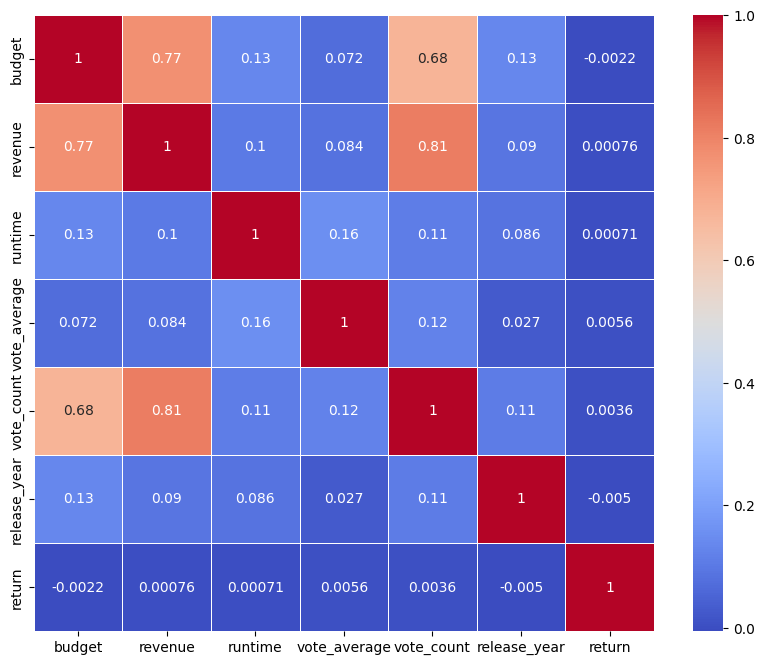

In [ ]:
# Exploremos las relaciones entre las variables numéricas.

# Seleccionar solo las columnas numéricas
numerical_columns = movies_df.select_dtypes(include=['float64', 'int64']).columns

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(movies_df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

La correlación positiva de $0.81$ entre `vote_count` y `revenue` sugiere que a medida que aumenta el número de votos que recibe una película, su recaudación también tiende a aumentar. Esto podría indicar que las películas que son bien recibidas o que generan mucho interés (y, por lo tanto, reciben más votos) tienden a tener un rendimiento financiero más alto.

La correlación positiva de $0,77$ entre `revenue` y `budget` sugiere que a medida que aumenta el presupuesto de una película, también tiende a aumentar su recaudación (`revenue`). Esto puede indicar que las películas con mayores presupuestos suelen tener más recursos para marketing, mejores efectos especiales, y en general, más capacidad para atraer a una audiencia mayor.

La correlación positiva de $0,68$ entre `vote_count` y `budget` indica una relación positiva fuerte, lo que sugiere que las películas con presupuestos más altos tienden a recibir más votos. Esto podría ser porque las películas más costosas suelen tener un mayor alcance y son vistas por más personas, lo que resulta en un mayor número de votos.

## 3.4. Análisis de variables categóricas

In [ ]:
# Revisaremos la distribución de las variables categóricas. Visualizaremos las más relevantes.


Columna `original_language`

In [ ]:
# Obtener los valores únicos de la columna 'original_language'
unique_languages = movies_df['original_language'].unique()

# Mostrar la lista de valores únicos
print(unique_languages)


['en' 'fr' 'zh' 'it' 'fa' 'nl' 'de' 'cn' 'ar' 'es' 'ru' 'ja' 'sv' 'ko'
 'sr' 'bn' 'pt' 'wo' 'ro' 'hu' 'cy' 'vi' 'cs' 'da' 'no' 'nb' 'pl' 'el'
 'sh' 'xx' 'mk' 'bo' 'ca' 'fi' 'th' 'sk' 'bs' 'he' 'hi' 'tr' 'is' 'ps'
 'ab' 'eo' 'ka' 'mn' 'bm' 'zu' 'uk' 'af' 'la' 'et' 'ku' 'fy' 'lv' 'ta'
 'sl' 'tl' 'ur' 'rw' 'id' 'bg' 'mr' 'lt' 'kk' 'ms' 'sq' 'qu' 'te' 'am'
 'jv' 'tg' 'ml' 'hr' 'lo' 'ay' 'kn' 'eu' 'ne' 'pa' 'ky' 'gl' 'uz' 'sm'
 'mt' 'hy' 'iu' 'lb' 'si']


In [ ]:
codigo_idioma = {
    'en': 'Inglés',
    'fr': 'Francés',
    'zh': 'Chino',
    'it': 'Italiano',
    'fa': 'Persa',
    'nl': 'Neerlandés',
    'de': 'Alemán',
    'cn': 'Chino',
    'ar': 'Árabe',
    'es': 'Español',
    'ru': 'Ruso',
    'ja': 'Japonés',
    'sv': 'Sueco',
    'ko': 'Coreano',
    'sr': 'Serbio',
    'bn': 'Bengalí',
    'pt': 'Portugués',
    'wo': 'Wolof',
    'ro': 'Rumano',
    'hu': 'Húngaro',
    'cy': 'Galés',
    'vi': 'Vietnamita',
    'cs': 'Checo',
    'da': 'Danés',
    'no': 'Noruego',
    'nb': 'Noruego Bokmål',
    'pl': 'Polaco',
    'el': 'Griego',
    'sh': 'Serbocroata',
    'xx': 'Indeterminado',
    'mk': 'Macedonio',
    'bo': 'Tibetano',
    'ca': 'Catalán',
    'fi': 'Finlandés',
    'th': 'Tailandés',
    'sk': 'Eslovaco',
    'bs': 'Bosnio',
    'he': 'Hebreo',
    'hi': 'Hindi',
    'tr': 'Turco',
    'is': 'Islandés',
    'ps': 'Pastún',
    'ab': 'Abjasio',
    'eo': 'Esperanto',
    'ka': 'Georgiano',
    'mn': 'Mongol',
    'bm': 'Bambara',
    'zu': 'Zulu',
    'uk': 'Ucraniano',
    'af': 'Afrikáans',
    'la': 'Latín',
    'et': 'Estonio',
    'ku': 'Kurdo',
    'fy': 'Frisio',
    'lv': 'Letón',
    'ta': 'Tamil',
    'sl': 'Esloveno',
    'tl': 'Tagalo',
    'ur': 'Urdu',
    'rw': 'Kinyarwanda',
    'id': 'Indonesio',
    'bg': 'Búlgaro',
    'mr': 'Marathi',
    'lt': 'Lituano',
    'kk': 'Kazajo',
    'ms': 'Malayo',
    'sq': 'Albanés',
    'qu': 'Quechua',
    'te': 'Telugu',
    'am': 'Amárico',
    'jv': 'Javanés',
    'tg': 'Tayiko',
    'ml': 'Malayalam',
    'hr': 'Croata',
    'lo': 'Laosiano',
    'ay': 'Aymara',
    'kn': 'Canarés',
    'eu': 'Euskera',
    'ne': 'Nepalí',
    'pa': 'Panjabi',
    'ky': 'Kirguís',
    'gl': 'Gallego',
    'uz': 'Uzbeko',
    'sm': 'Samoano',
    'mt': 'Maltés',
    'hy': 'Armenio',
    'iu': 'Inuktitut',
    'lb': 'Luxemburgués',
    'si': 'Cingalés'
}

In [ ]:
# Función para reemplazar los códigos de idioma por nombres completos
def reemplazar_idioma(codigo):
    return codigo_idioma.get(codigo, codigo)  # Devuelve el código original si no está en el diccionario

In [ ]:
# Aplicamos la función a la columna 'original_language'
movies_df['original_language'] = movies_df['original_language'].apply(reemplazar_idioma)

# Mostramos las primeras filas del DataFrame para verificar
movies_df[['original_language']].head()

,original_language
0,Inglés
1,Inglés
2,Inglés
3,Inglés
4,Inglés


<ipython-input-82-91f0d450ee3d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')


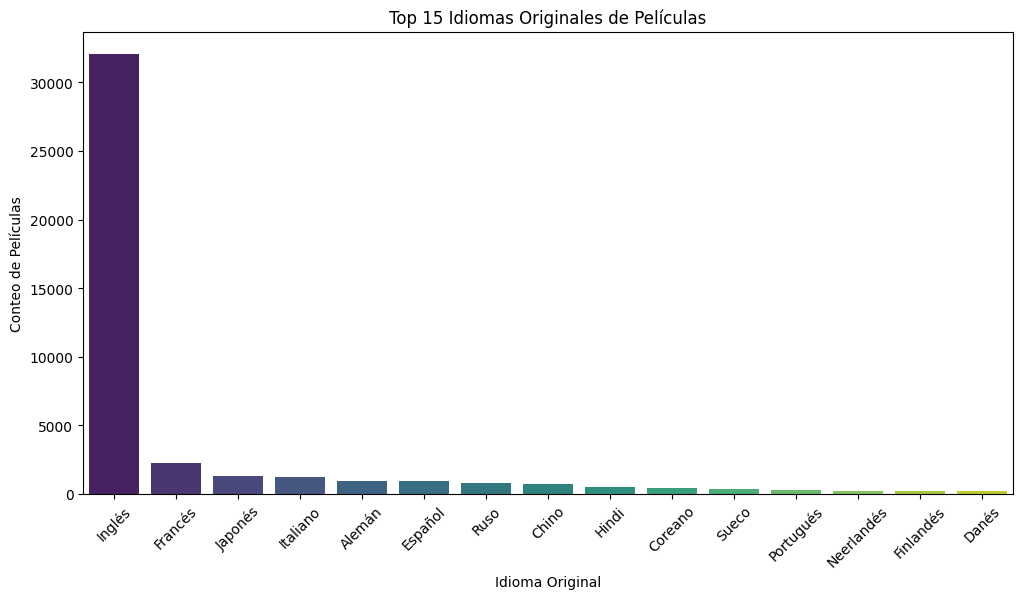

In [ ]:
import seaborn as sns

# Contar las ocurrencias de cada idioma
language_counts = movies_df['original_language'].value_counts()

# Seleccionar los primeros 15 idiomas con mayor conteo
top_languages = language_counts.head(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')
plt.title('Top 15 Idiomas Originales de Películas')
plt.xlabel('Idioma Original')
plt.ylabel('Conteo de Películas')
plt.xticks(rotation=45)
plt.show()

Podemos apreciar en esta gráfica lo siguiente:

- La barra que representa el idioma inglés es extremadamente alta en comparación con los otros $14$ idiomas mostrados, lo que indica que la mayoría de las películas en el dataset tienen el inglés como idioma original.

- El número de películas en inglés supera las 30,000, muy por encima de cualquier otro idioma.

- Idiomas como chino, hindi, coreano, sueco, portugués, neerlandés, finlandés y danés aparecen, pero con un número muy reducido de películas, probablemente por debajo de las 500 películas cada uno.

Columna `Status`

<ipython-input-84-d4019edb9116>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='magma')


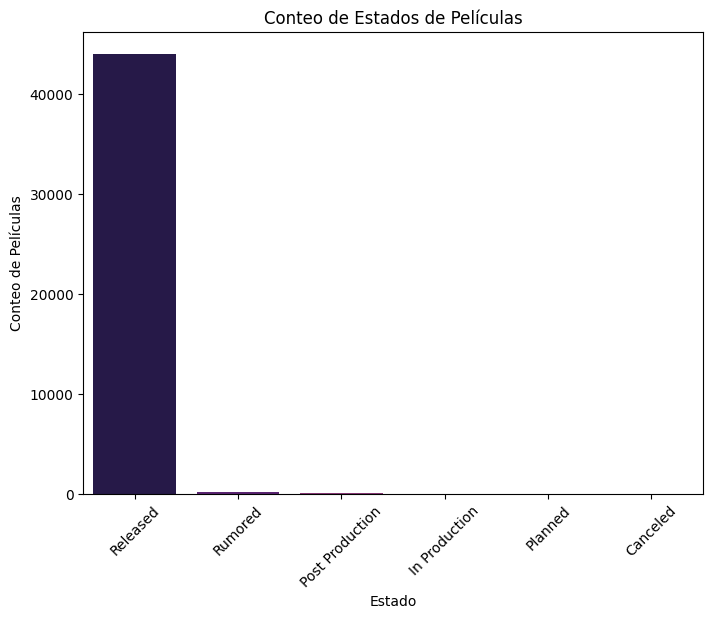

In [ ]:
# Contamos las ocurrencias de cada estado
status_counts = movies_df['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='magma')
plt.title('Conteo de Estados de Películas')
plt.xlabel('Estado')
plt.ylabel('Conteo de Películas')
plt.xticks(rotation=45)
plt.show()

El estado Released (lanzadas) es, con diferencia, el más común. Se observa que supera las $40,000$ películas, lo que indica que la gran mayoría de las películas en tu dataset han sido completadas y lanzadas oficialmente.

In [ ]:
# Contamos las ocurrencias de cada estado
status_counts = movies_df['status'].value_counts()
print(status_counts)


status
Released           44020
Rumored              216
Post Production       96
In Production         16
Planned               12
Canceled               1
Name: count, dtype: int64


In [ ]:
# Dado que la gran mayoria de los status se encuentran en la categoría "Released"
# Se aprecia que esta columna no varía mucho, luego parece no aportar valor significativo
# a un sistema de recomendación basado en similitud de contenido, es viable prescindir
# de ella para el modelo

movies_df.drop(columns=['status'], inplace=True)

Columna `genres`

<ipython-input-89-0cde1652a0e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


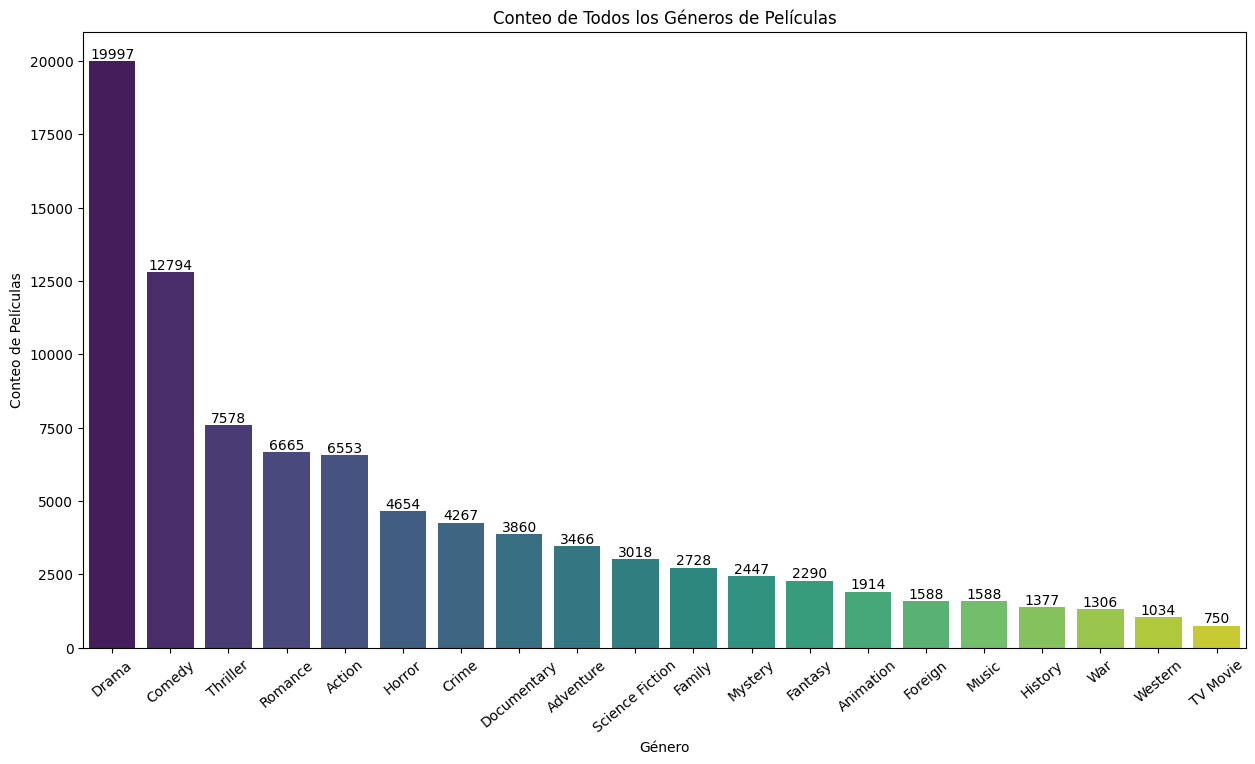

In [ ]:
# Desanidar los géneros
all_genres = movies_df['genres'].explode()

# Contar las ocurrencias de cada género
genre_counts = all_genres.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Mostrar valores en la parte superior de las barras
for i in barplot.containers:
    barplot.bar_label(i, label_type='edge', fontsize=10)

# Configurar el gráfico
plt.title('Conteo de Todos los Géneros de Películas')
plt.xlabel('Género')
plt.ylabel('Conteo de Películas')
plt.xticks(rotation=40)  # Ajuste de la rotación de las etiquetas del eje X

plt.show()

**Géneros más representados:**

Drama es el género más común con apróximadamente $20,000$ películas, seguido por Comedy (Comedia) y Thriller, ambos con un número significativo de películas (alrededor de $12,000$ y $8,000$ respectivamente).Esto sugiere que el dataset está fuertemente sesgado hacia géneros más dramáticos y cómicos.

**Géneros menos representados:**

Hacia el final de la gráfica, géneros como Western, War, y TV Movie tienen una representación mucho menor, con menos de $1,000$ películas cada uno. Esto podría deberse a la naturaleza del dataset, donde estos géneros son menos frecuentes.

**Distribución equilibrada en la parte media:**

Géneros como Action, Horror, Crime, y Documentary tienen una distribución más cercana entre sí, con un número de películas en el rango de $4,000$ a $6,000$.

Columna `popularity`

In [ ]:
# Convertir la columna 'popularity' a tipo numérico, forzando errores a NaN
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

# Opcional: verificar cuántos valores se convirtieron a NaN
print(movies_df['popularity'].isna().sum())

0


<ipython-input-91-78aff9eeddf4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_populares, x='popularity', y='title', palette='viridis')


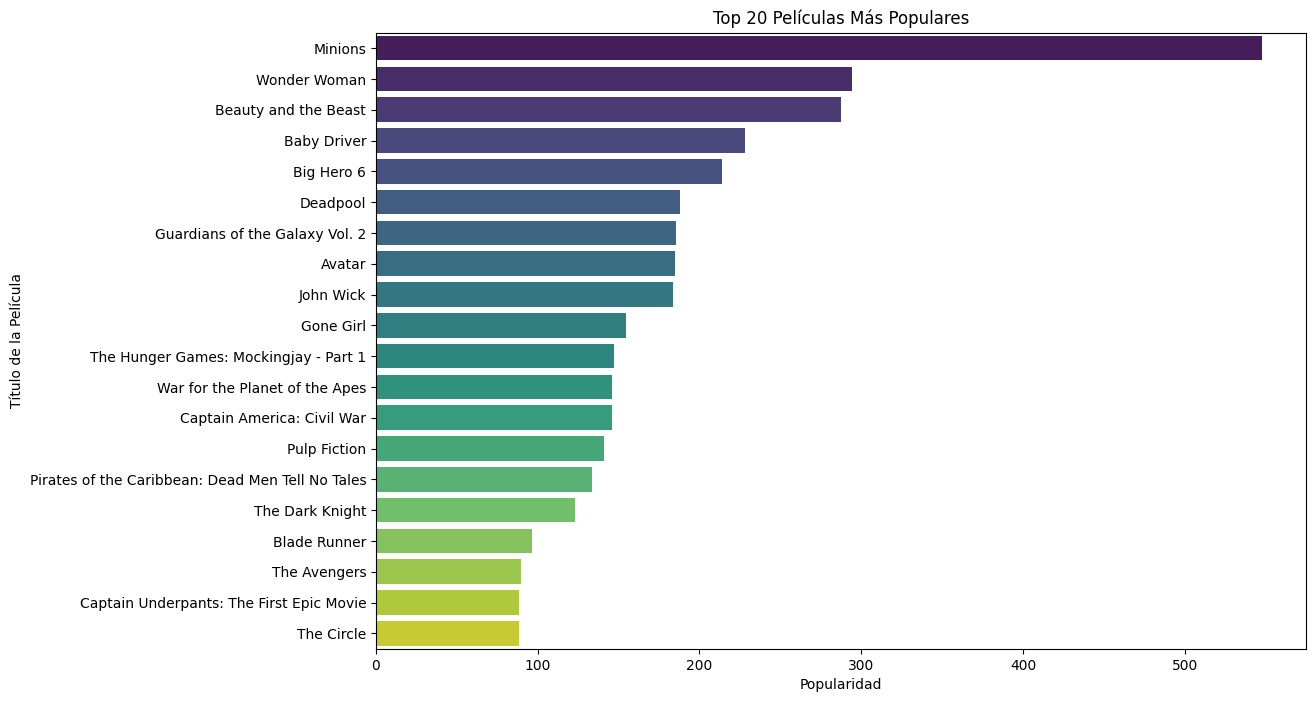

In [ ]:
# Seleccionamos las 20 películas más populares
top_20_populares = movies_df.nlargest(20, 'popularity')[['title', 'popularity']]

# Configuramos el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_populares, x='popularity', y='title', palette='viridis')

# Añadimos título y etiquetas
plt.title('Top 20 Películas Más Populares')
plt.xlabel('Popularidad')
plt.ylabel('Título de la Película')

# Mostramos el gráfico
plt.show()

- *Minions* es la película que tiene la popularidad más alta, destacándose mucho más que las otras películas, con un valor de popularidad por encima de 500.

- *Wonder Woman* y *Beauty* and the Beast siguen en el ranking con popularidades también altas, aunque significativamente por debajo de Minions. Estas dos películas están por encima del valor de 300.

- La popularidad de las películas parece decrecer de manera gradual. Después de las tres primeras, las demás películas presentan una distribución más pareja entre sí en términos de popularidad.

- Las películas del ranking mostradi pertenecen a una amplia gama de géneros, desde animación (Minions, Big Hero 6), superhéroes (Wonder Woman, Captain America), acción (John Wick), ciencia ficción (Avatar, Blade Runner), hasta clásicos del cine (Pulp Fiction).

Columna `spoken_languages`

In [92]:
# Obtener todos los idiomas únicos en la columna 'spoken_languages'
all_languages = []
for languages in movies_df['spoken_languages'].dropna():
  if isinstance(languages, list):
    all_languages.extend(languages)

# Obtener los valores únicos
unique_languages = set(all_languages)

# Imprimir la lista de valores únicos
print(list(unique_languages))


['', 'Norsk', 'ਪੰਜਾਬੀ', 'فارسی', 'Gaeilge', 'Português', 'বাংলা', 'Hrvatski', 'ελληνικά', 'Український', 'euskera', 'العربية', 'Malti', 'isiZulu', 'ozbek', 'Galego', '?????', 'Srpski', '한국어/조선말', 'ქართული', 'Latin', 'Bokmål', 'اردو', 'Cymraeg', '日本語', 'Español', 'Nederlands', 'Pусский', 'Kiswahili', 'Fulfulde', 'English', 'Français', 'Türkçe', 'Bamanankan', 'svenska', 'Català', 'Magyar', 'Bosanski', 'עִבְרִית', 'Hausa', 'Lietuvi\x9akai', 'Eesti', 'Esperanto', 'Azərbaycan', 'ภาษาไทย', 'suomi', 'Somali', 'தமிழ்', 'Slovenčina', 'हिन्दी', 'پښتو', 'shqip', 'Bahasa melayu', '广州话 / 廣州話', 'Dansk', 'Bahasa indonesia', 'Tiếng Việt', 'Íslenska', 'No Language', 'қазақ', 'Slovenščina', '??????', '普通话', 'Polski', 'Český', 'Latviešu', 'Afrikaans', 'беларуская мова', 'Kinyarwanda', 'Română', 'Wolof', 'Deutsch', 'తెలుగు', 'Italiano', 'български език']


In [93]:
# Diccionario de traducción de idiomas
idiomas_a_espanol = {
    'Türkçe': 'Turco',
    'Bamanankan': 'Bamanankan',
    'Norsk': 'Noruego',
    'Eesti': 'Estonio',
    'Bosanski': 'Bosnio',
    'No Language': 'Sin idioma',
    'Magyar': 'Húngaro',
    'Català': 'Catalán',
    'suomi': 'Finlandés',
    'isiZulu': 'Zulu',
    '?????': 'Desconocido',
    'Latin': 'Latín',
    '广州话 / 廣州話': 'Cantonés',
    '한국어/조선말': 'Coreano',
    'Wolof': 'Wolof',
    'Kinyarwanda': 'Kinyarwanda',
    'Pусский': 'Ruso',
    'Slovenščina': 'Esloveno',
    'ozbek': 'Uzbeco',
    'Galego': 'Gallego',
    'ελληνικά': 'Griego',
    'ਪੰਜਾਬੀ': 'Panjabi',
    'Hausa': 'Hausa',
    'Italiano': 'Italiano',
    'Fulfulde': 'Fulfulde',
    'Gaeilge': 'Irlandés',
    'Nederlands': 'Neerlandés',
    '日本語': 'Japonés',
    'Srpski': 'Serbio',
    'தமிழ்': 'Tamil',
    'العربية': 'Árabe',
    'Français': 'Francés',
    'Azərbaycan': 'Azerbaiyano',
    'Lietuvi\x9akai': 'Lituano',
    'беларуская мова': 'Bielorruso',
    'Română': 'Rumano',
    'Kiswahili': 'Suajili',
    'اردو': 'Urdu',
    'English': 'Inglés',
    'svenska': 'Sueco',
    'తెలుగు': 'Telugu',
    'қазақ': 'Kazajo',
    'Český': 'Checo',
    'हिन्दी': 'Hindi',
    'Bahasa indonesia': 'Indonesio',
    'فارسی': 'Persa',
    'Afrikaans': 'Afrikáans',
    'Bokmål': 'Bokmål',
    'Español': 'Español',
    'shqip': 'Albanés',
    'Cymraeg': 'Galés',
    'Polski': 'Polaco',
    '??????': 'Desconocido',
    'বাংলা': 'Bengalí',
    'Português': 'Portugués',
    'Slovenčina': 'Eslovaco',
    'български език': 'Búlgaro',
    'Malti': 'Maltés',
    'Hrvatski': 'Croata',
    'Український': 'Ucraniano',
    'ภาษาไทย': 'Tailandés',
    'Latviešu': 'Letón',
    'Esperanto': 'Esperanto',
    'עִבְרִית': 'Hebreo',
    'Deutsch': 'Alemán',
    'ქართული': 'Georgiano',
    '普通话': 'Mandarín',
    'euskera': 'Vasco',
    'Íslenska': 'Islandés',
    'پښتو': 'Pashto',
    'Somali': 'Somalí',
    'Bahasa melayu': 'Malayo',
    'Dansk': 'Danés',
    'Tiếng Việt': 'Vietnamita'
}

In [94]:
# Función para traducir los idiomas, manejando listas
def traducir_idioma(idioma):
    if isinstance(idioma, list):
        # Si el idioma es una lista, traducimos cada idioma y lo unimos en una cadena
        return ', '.join(idiomas_a_espanol.get(i, 'Desconocido') for i in idioma)
    else:
        # Si no es una lista, solo traducimos el idioma
        return idiomas_a_espanol.get(idioma, 'Desconocido')

# Aplicar la función a la columna 'spoken_languages'
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(traducir_idioma)

# Mostrar las primeras filas del DataFrame para verificar
print(movies_df[['spoken_languages']].head())

  spoken_languages
0           Inglés
1  Inglés, Francés
2           Inglés
3           Inglés
4           Inglés


## 2.5. Análisis temporal

Columna `release_year`

Estudiaremos la variable release_year para ver la evolución del número de películas a lo largo del tiempo y su relación con el presupuesto y los ingresos.

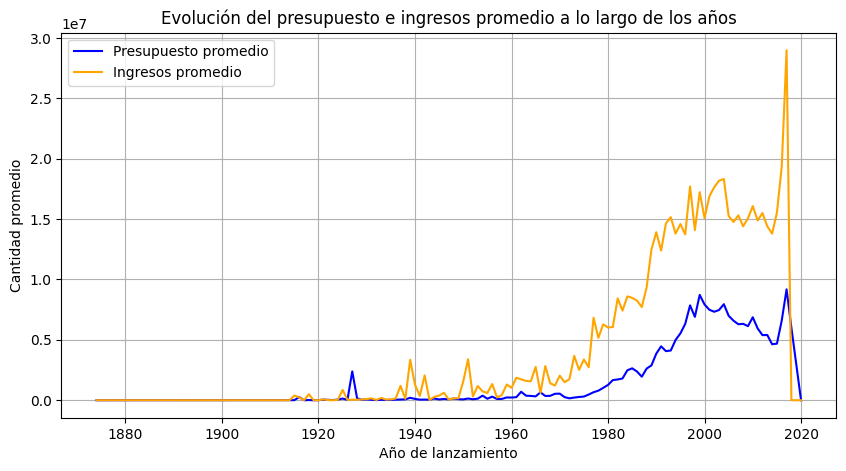

In [95]:
# Evolución del presupuesto e ingresos a lo largo de los años

# Agrupamos por año de lanzamiento y calculamos el promedio de presupuesto e ingresos
movies_by_year = movies_df.groupby('release_year').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Visualización de presupuesto e ingresos a lo largo de los años
plt.figure(figsize=(10, 5))
sns.lineplot(data=movies_by_year, x='release_year', y='budget', label='Presupuesto promedio', color='blue')
sns.lineplot(data=movies_by_year, x='release_year', y='revenue', label='Ingresos promedio', color='orange')
plt.title('Evolución del presupuesto e ingresos promedio a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad promedio')
plt.legend()
plt.grid(True)
plt.show()

- Desde finales del siglo XIX hasta aproximadamente 1930, tanto el presupuesto como los ingresos eran bajos y apenas registran fluctuaciones significativas.

- A partir de los años 1930, se observa un aumento notable en los ingresos promedio (curva naranja), mientras que el presupuesto (curva azul) comienza a elevarse, pero con menos intensidad. Esta tendencia se mantiene en aumento hasta los años 1960.

- En la década de los 80, ambos valores muestran un incremento más pronunciado, con una correlación más visible entre presupuesto e ingresos.

- Las películas comienzan a generar ingresos significativamente mayores en comparación con los presupuestos.

- Hay picos marcados tanto en ingresos como en presupuestos alrededor del año 2000. Esto puede reflejar la creciente inversión y éxito de grandes producciones cinematográficas en esta época.

- En los últimos años (hacia 2020), se nota un pico particularmente agudo en ingresos, que podría estar influenciado por algunas superproducciones o fenómenos de taquilla (posiblemente películas con alto impacto mundial).

<ipython-input-96-5ffb565529bf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=year_group_counts.index, y=year_group_counts.values, palette='rocket')  # Colores más vivos
<ipython-input-96-5ffb565529bf>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(year) for year in year_group_counts.index])


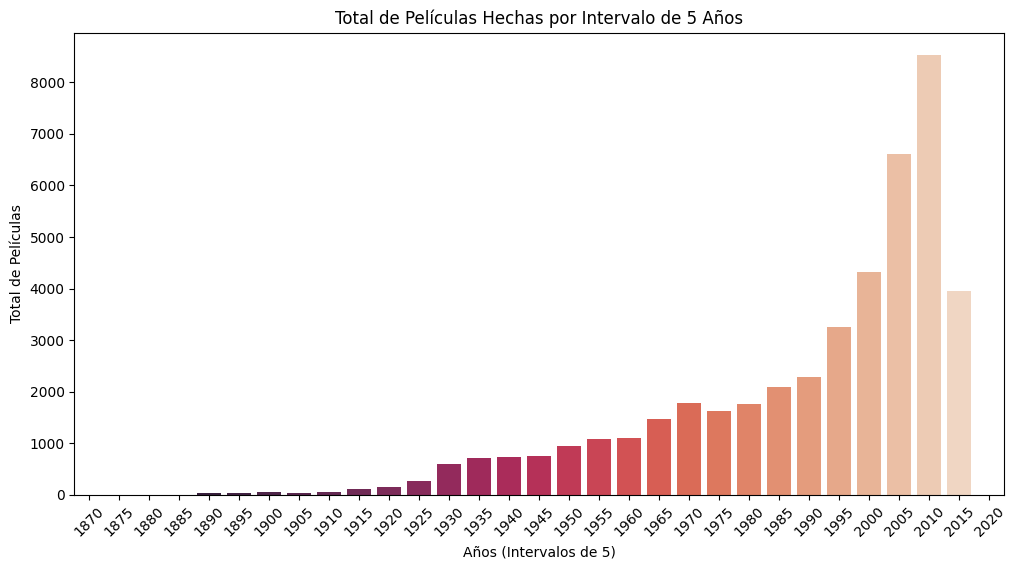

In [96]:
# Contar la cantidad de películas por año

# Creamos una nueva columna para agrupar los años en intervalos de 5 años
movies_df['year_group'] = (movies_df['release_year'] // 5) * 5 # La expresión divide cada año entre 5 (usando la división entera) y luego multiplica el resultado por 5.
#Esto convierte, por ejemplo, los años 1990 a 1994 en 1990, los años 1995 a 1999 en 1995, y así sucesivamente

# Contar la cantidad de películas por intervalo de 5 años
year_group_counts = movies_df['year_group'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=year_group_counts.index, y=year_group_counts.values, palette='rocket')  # Colores más vivos
plt.title('Total de Películas Hechas por Intervalo de 5 Años')
plt.xlabel('Años (Intervalos de 5)')
plt.ylabel('Total de Películas')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor legibilidad

# Quitar el punto decimal de las etiquetas del eje X
ax.set_xticklabels([int(year) for year in year_group_counts.index])

plt.show()

- Desde los inicios del cine hasta la década de 1940, la cantidad de películas producidas por intervalo de 5 años es muy baja, apenas superando las 500 películas hasta los años 1930-1940. Esto es lógico, ya que el cine estaba en su fase temprana y el número de producciones era limitado.

- Después de la Segunda Guerra Mundial, en los años 50 y 60, se nota un incremento constante en la producción de películas. Este crecimiento refleja la expansión de la industria cinematográfica global, así como la aparición de nuevas tecnologías que permitieron la producción masiva de películas.

- Desde la década de los 90 hasta el año 2010, el número de películas producidas por intervalo de 5 años aumenta exponencialmente, alcanzando su punto más alto entre 2010 y 2015 con más de 8,000 películas. Esto coincide con la era del cine digital y la globalización del entretenimiento, lo que permitió una mayor facilidad para crear y distribuir películas a nivel mundial.

- Aunque sigue siendo un número alto en comparación con décadas anteriores, se observa un descenso en la producción de películas entre 2015 y 2020. Este descenso podría explicarse por varios factores, pdría ser porque no hay datos después de cierta fecha o debido a la pandemia del COVID-19 que afectó gravemente la producción cinematográfica global en 2020, además de posibles cambios en la forma en que el contenido se distribuye (streaming, series, etc.).

In [97]:
# movies_df.to_csv('movies_df.csv', index=False)

# from google.colab import files
# files.download('movies_df.csv')


# 4. Muestra

Debido al peso de los archivos se restringe el tamaño de los datasets, esto con el fin de no tener inconvenientes al momento de deployar la API en Render. Así que tomamos una muestra aleatoria de 30.000 filas.

In [99]:
# Seleccionar una muestra aleatoria de 30000 filas
movies_sample_df = movies_df.sample(n=30000, random_state=42)

# Mostrar las primeras filas de la muestra seleccionada
print(movies_sample_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 12082 to 7476
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                30000 non-null  float64       
 1   genres                30000 non-null  object        
 2   id                    30000 non-null  object        
 3   original_language     30000 non-null  object        
 4   overview              30000 non-null  object        
 5   popularity            30000 non-null  float64       
 6   production_companies  30000 non-null  object        
 7   production_countries  30000 non-null  object        
 8   release_date          30000 non-null  datetime64[ns]
 9   revenue               30000 non-null  float64       
 10  runtime               30000 non-null  float64       
 11  spoken_languages      30000 non-null  object        
 12  title                 30000 non-null  object        
 13  vote_average      

In [100]:
# Exportar el DataFrame 'movies_sample_df' a un archivo CSV
#movies_sample_df.to_csv('movies_sample_df.csv', index=False)

# Descargar el archivo desde Colab
#from google.colab import files
#files.download('movies_sample_df.csv')